In [204]:
!pwd

/c/Users/andreaguiar/Desktop/usr/dev/ironhack/interactive-viz


In [ ]:
!pip uninstall plotly
# conda uninstall plotly
!pip uninstall cufflinks
!pip install cufflinks==0.16.0

In [ ]:
# plotly 4.x.x  --> cufflinks 0.17.0 não funciona
# tem que instalar cufflinks 0.16.0

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import cufflinks as cf

import pandas as pd
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cf.go_offline()

In [5]:
df = pd.read_csv('./data/churn.csv')

FileNotFoundError: [Errno 2] File ./data/churn.csv does not exist: './data/churn.csv'

In [6]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

NameError: name 'df' is not defined

# Histogram

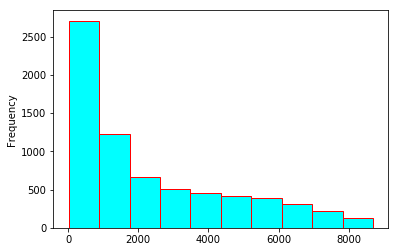

In [18]:
df['TotalCharges'].plot(kind='hist', edgecolor='red', facecolor='cyan', bins=10)

In [205]:
df['TotalCharges'].iplot(kind='hist', title='Frequency of Total Charges',
                         xTitle='Total Charges', yTitle='Frequency', bins=20)

# Bar plot

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# create variable ChurnBinary (1-0) based on Churn (Yes-No)
df['ChurnBinary'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [24]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0


In [207]:
# get the average of churn for each payment method
data = df.groupby('PaymentMethod', as_index=False)['ChurnBinary'].mean()

In [208]:
data

,PaymentMethod,ChurnBinary
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


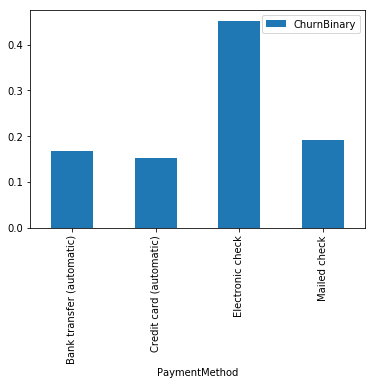

In [209]:
data.plot(kind='bar', x='PaymentMethod')

In [213]:
data.iplot(kind='bar', x='PaymentMethod', color='red')

## Text in Figures

Text(0.6, 0.6, 'PROF')

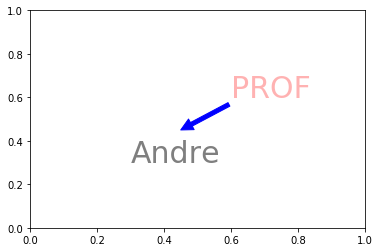

In [180]:
fig, ax = plt.subplots()

ax.text(0.3, 0.3, 'Andre', fontsize=30, alpha=0.5)

ax.annotate('PROF', 
            xy=(0.45, 0.45), 
            fontsize=30, alpha=0.3, color='red',
            xytext=(0.6,0.6),
            arrowprops=dict(color='b'))

In [181]:
list(zip(data.index, data['ChurnBinary']))

[(0, 0.16709844559585493),
 (1, 0.15243101182654403),
 (2, 0.4528541226215645),
 (3, 0.19106699751861042)]

In [182]:
for item in list(zip(data.index, data['ChurnBinary'])):
    print(item[1])

0.16709844559585493
0.15243101182654403
0.4528541226215645
0.19106699751861042


In [183]:
annotations = list(zip(data.index, data.ChurnBinary + 0.05))
annotations

[(0, 0.21709844559585495),
 (1, 0.20243101182654405),
 (2, 0.5028541226215645),
 (3, 0.24106699751861044)]

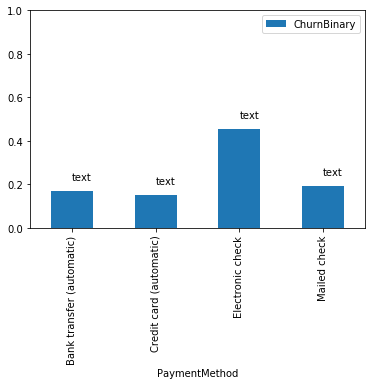

In [184]:
fig, ax = plt.subplots()
data.plot(kind='bar', x='PaymentMethod', ax=ax)


ax.set_ylim([0, 1])
for text_pos in annotations:
    ax.annotate('text', text_pos )



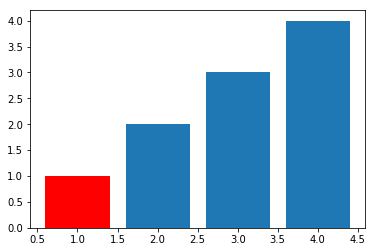

In [185]:
# change color of one color bar

barlist = plt.bar([1,2,3,4], [1,2,3,4])
barlist[0].set_color('r')

# Line Plot

In [29]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0


In [190]:
# tenure: tempo de casa

data = df.groupby('tenure', as_index=False).agg({'ChurnBinary':'mean'})

In [191]:
data

,tenure,ChurnBinary
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


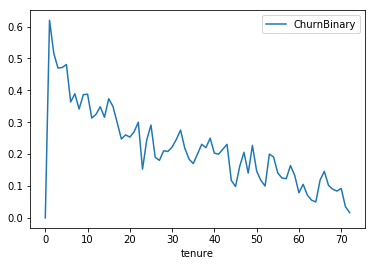

In [192]:
data.plot(kind='line', x='tenure')

In [193]:
data.iplot(kind='line', x='tenure')

# Scatter Plot

In [194]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [195]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [196]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [197]:
data = df.query('Contract == "One year" and PaymentMethod == "Credit card (automatic)"')

In [1]:
data.iplot(x='tenure', y='TotalCharges', mode='markers', color='red', )

NameError: name 'data' is not defined

In [199]:
import numpy

In [168]:
data.iplot(x='tenure', y='TotalCharges', categories='InternetService') # hue

c:\programas\anaconda3\lib\site-packages\cufflinks\plotlytools.py:805: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\programas\anaconda3\lib\site-packages\cufflinks\plotlytools.py:808: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# Bubble

In [173]:
data = data.query('PhoneService == "No"')

data.iplot(kind='bubble', x='tenure', y='MonthlyCharges', size='TotalCharges', categories='gender')


c:\programas\anaconda3\lib\site-packages\cufflinks\plotlytools.py:805: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\programas\anaconda3\lib\site-packages\cufflinks\plotlytools.py:808: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

